<a href="https://colab.research.google.com/github/minionpika/DDPM/blob/main/Experiment_2_forwardDiffusionProcessFromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

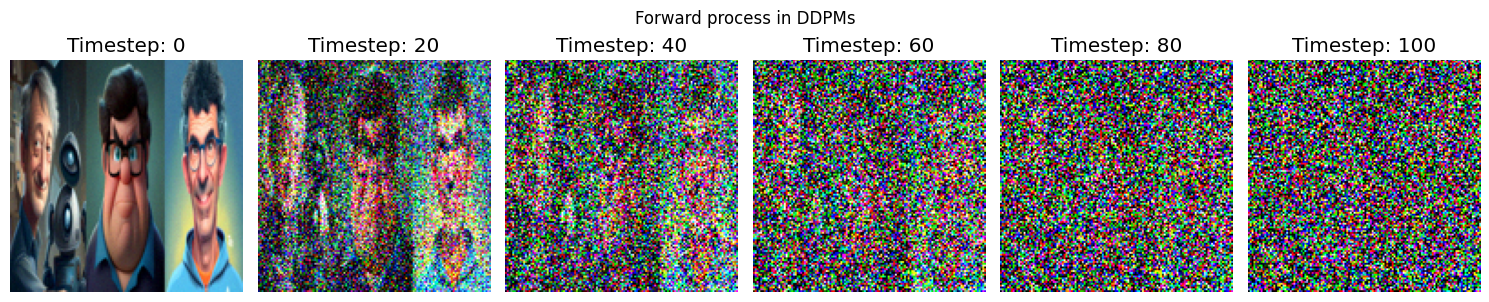

In [ ]:
import os
import scipy
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

seed = 1234
np.random.seed(seed)
plt.style.use('ggplot')

%config IPCompleter.use_jedi = False
%config InlineBackend.figure_format='png'
%matplotlib inline

def forward_process_ddpms(img_t_minus_1, beta, t):
    """Implements the forward process of a DDPM model.

    Args:
        img_t_minus_1: Image at the previous timestep (t - 1)
        beta: Scheduled Variance
        t: Current timestep
    Returns:
        Image obtained at current timestep
    """

    # 1. Obtain beta_t. Reshape it to have the same number of
    # dimensions as our image array
    beta_t = beta[t].reshape(-1, 1, 1)

    # 2. Calculate mean and variance
    mu = np.sqrt((1.0 - beta_t)) * img_t_minus_1
    sigma = np.sqrt(beta_t)

    # 3. Obtain image at timestep t using equation (15)
    img_t = mu + sigma * np.random.randn(*img_t_minus_1.shape)
    return img_t


# Let's check if ourforward process function is
# doing what it is supposed to do on a sample image

# 1. Load image using PIL (or any other library that you prefer)
img = Image.open('/content/drive/MyDrive/Colab Notebooks/ESE 531/midjourney.jpg')

# 2. Resize the image to desired dimensions
IMG_SIZE = (128, 128)
img = img.resize(size=IMG_SIZE)

# 3. Define number of timesteps
timesteps = 100

# 4. Generate beta (variance schedule)
beta_start = 0.0001
beta_end = 0.05
beta = np.linspace(beta_start, beta_end, num=timesteps, dtype=np.float32)


processed_images = []
img_t = np.asarray(img.copy(), dtype=np.float32) / 255.

# 5. Run the forward process to obtain img after t timesteps
for t in range(timesteps):
    img_t = forward_process_ddpms(img_t_minus_1=img_t, beta=beta, t=t)
    if t%20==0 or t==timesteps - 1:
        sample = (img_t.clip(0, 1) * 255.0).astype(np.uint8)
        processed_images.append(sample)

# 6. Plot and see samples at different timesteps
_, ax = plt.subplots(1, len(processed_images), figsize=(15, 6))

for i, sample in enumerate(processed_images):
    ax[i].imshow(sample)
    ax[i].set_title(f"Timestep: {i*20}")
    ax[i].axis("off")
    ax[i].grid(False)

plt.suptitle("Forward process in DDPMs", y=0.75)
plt.tight_layout()
plt.axis("off")
plt.savefig('/content/drive/MyDrive/Colab Notebooks/ESE 531/midjourneyForwardOutput', pad_inches=0, bbox_inches='tight')
plt.show()
plt.close()